# Introduction

Are you a job seeker who has wandered around so much trying to find a way to break into the information technolody field? The good news is that you are not alone and fortunately we have the data to help.

In this notebook, we will use datasets featuring the results of a Stack Overflow survey of software developers from 2017 to find answers to some real-world application questions I find even personal. 

The data is made up of two files:

- survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer

- survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name

Although this survey pertains to software developers, but I believe it can be applicable to any tech jobs like Data Science, Artificial Intelligence, Blockchain Development, to name a few. I hope that the results in this notebook satisfies your curosity and helps you make informed decision afterwards.

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from collections import defaultdict 
%matplotlib inline

In [2]:
#load data
df = pd.read_csv('survey-results-public.csv')
df_schema = pd.read_csv('survey-results-schema.csv')

# Exploratory Data Analysis

In [3]:
# print number rows x and columns y in the data in the format (x, y)
df.shape

(51392, 154)

In [4]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
pd.set_option('display.max_colwidth', None)
df_schema.head

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to open source projects?
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree-granting college or university program?"


The respondent dataset has 154 features and 51392 observations. We will break into this datasets by posing different questions. 

## What  qualifications do most software developers have?

There are competing views on how to become a software developer. Do I need a degree in computer science or software engineering to become a developer? Will a bachelor's degree only be sufficient for me to have a great job satisfaction?

This section of the notebook will look at formal education, other kind of education asides formal education. 

In [46]:
def num_missing_value(col):
    """ Counts the number of missing values in a column"""
    return df[col].isnull().sum()

In [26]:
def print_question(col):
    """ A function to print the question corresponding to a given column in schema dataframe
    """
    return list(df_schema[df_schema.Column == col]['Question']) 

In [38]:
def value_count_plot(df, col, title, plot=True):
    """
    INPUT 
        df - a pandas dataframe holding the columns you want to plot
        title - string the title of your plot
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the EducationTypes column.
    """
    count_prop = (df[col].value_counts())/df.shape[0]

    #plot the proportion of the formal education counts above
    if plot:
        plt.figure(figsize = [6, 5])
        count_prop.sort_values().plot(kind="barh", width = 0.7);
        plt.title(title);
        plt.xticks(fontsize=12);
        plt.yticks(fontsize=12);
        plt.show();
    return count_prop
    

### Professionals

In [131]:
print_question('Professional')

['Which of the following best describes you?']

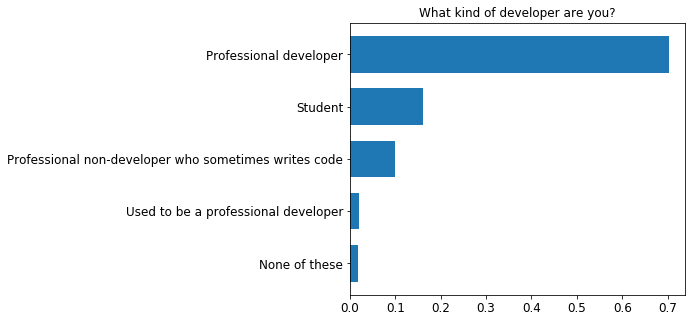

Professional developer                                  0.703047
Student                                                 0.160025
Professional non-developer who sometimes writes code    0.100016
Used to be a professional developer                     0.019127
None of these                                           0.017785
Name: Professional, dtype: float64

In [134]:
value_count_plot(df,"Professional","What kind of developer are you?")

About 70% of respondents are professional developers. Now because our interest is to get answers from people in software developing world, will narrow our dataset to these category.

In [136]:
df_prof_dev = df[df['Professional'] =='Professional developer']
#test
df_prof_dev['Professional'].value_counts()

Professional developer    36131
Name: Professional, dtype: int64

### Formal Education

In [30]:
print_question('FormalEducation')

["Which of the following best describes the highest level of formal education that you've completed?"]

In [47]:
num_missing_value('FormalEducation')

0

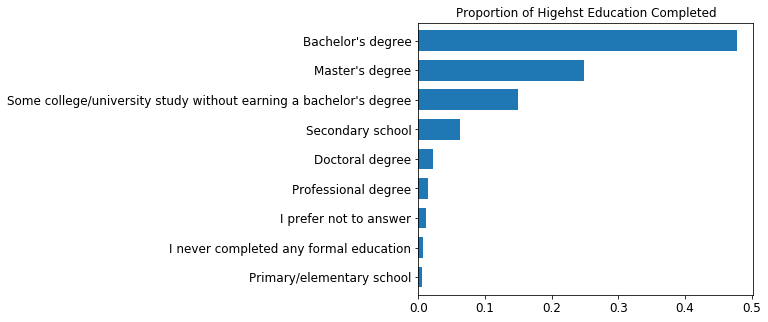

Bachelor's degree                                                    0.478536
Master's degree                                                      0.248623
Some college/university study without earning a bachelor's degree    0.149179
Secondary school                                                     0.063104
Doctoral degree                                                      0.021893
Professional degree                                                  0.015029
I prefer not to answer                                               0.010766
I never completed any formal education                               0.007224
Primary/elementary school                                            0.005646
Name: FormalEducation, dtype: float64

In [141]:
value_count_plot(df_prof_dev,"FormalEducation","Proportion of Higehst Education Completed")

About 48% of respondents have Bachelors degree, 25% have Master's degree while only 2% have Doctoral degree. Let us explore the main field of study for the undergraduate studies.

### Undergraduate Majors

In [31]:
print_question('MajorUndergrad')

["Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?"]

In [48]:
num_missing_value('MajorUndergrad')

8551

**Comment**

So we see there are 8551 missing values in the MajorUndergrad column. These are likely coming form respondents who reported formal education such as secondary school, I prefer not to answer, Primary/elementary school, I never completed any formal education, Some college/university study without earning a bachelor's degree. Since our goal for now is to understand the descriptive statistics of our dataset, we will not worry about the missing values.

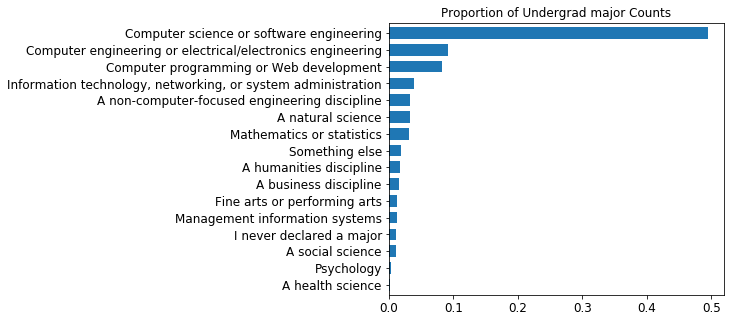

Computer science or software engineering                        0.494368
Computer engineering or electrical/electronics engineering      0.091390
Computer programming or Web development                         0.082976
Information technology, networking, or system administration    0.039661
A non-computer-focused engineering discipline                   0.032991
A natural science                                               0.032133
Mathematics or statistics                                       0.030998
Something else                                                  0.019429
A humanities discipline                                         0.017464
A business discipline                                           0.015638
Fine arts or performing arts                                    0.013230
Management information systems                                  0.013064
I never declared a major                                        0.011790
A social science                                   

In [138]:
value_count_plot(df_prof_dev,"MajorUndergrad","Proportion of Undergrad major Counts")

There is a clear difference in the figure above. 49% of the respondents majored in Computer Science or Software Engineering in their undergraduate studies; while the rest percentage is split accross 15 disciplines. Interestingly, only 3% had Mathematics or Statistics as their major, which implies one does not necessary need a strong math skill to become a software developer. 

### Other Formal Education

Let us have a look at what type of education most respondents did outside of their formal schooling and education, in order to become software developers.

In [32]:
print_question('EducationTypes')

['Outside of your formal schooling and education, which of the following have you done?']

In [56]:
num_missing_value('EducationTypes')

21038

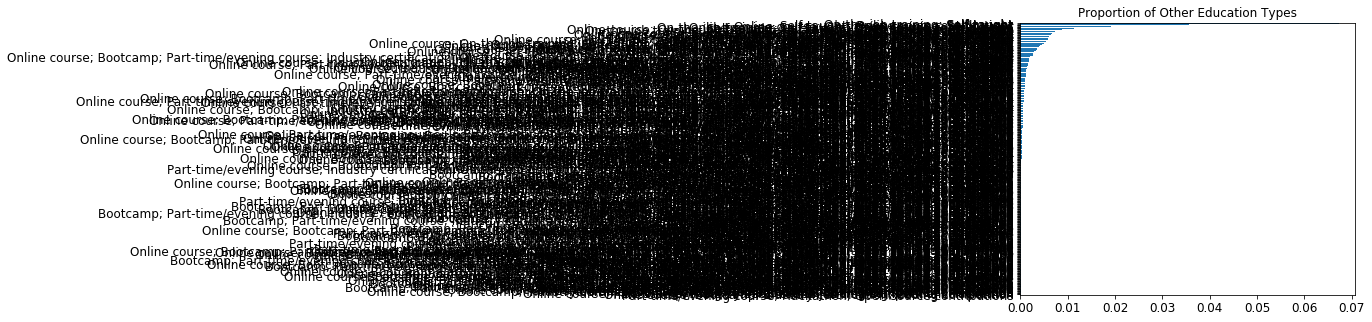

In [139]:
edu_types = value_count_plot(df_prof_dev,"EducationTypes","Proportion of Other Education Types")

Looks like the EducationTypes column is messy. Let us have a closer peek 

In [140]:
value_count_plot(df_prof,"EducationTypes","Proportion of Other Education Types", plot=False).head(10)

Self-taught                                                                   0.067394
On-the-job training; Self-taught                                              0.039163
Self-taught; Open source contributions                                        0.035537
Online course; Self-taught                                                    0.029697
Online course; On-the-job training; Self-taught                               0.028424
On-the-job training; Self-taught; Open source contributions                   0.019097
Online course; Self-taught; Open source contributions                         0.015914
Self-taught; Hackathon; Open source contributions                             0.012150
Online course; On-the-job training; Self-taught; Open source contributions    0.011375
Self-taught; Hackathon                                                        0.008801
Name: EducationTypes, dtype: float64

**Comment**


Most respondents have mentioned nore than one education types and that made things pretty messy. So possible education types as we cab see include Self-taught, Online courses, participating in open source contributions, On-the-job training, Hackathon, Coding competition, Part-time/evening course, Industry certification, and Bootcamp. 

We will extract each of the education types and count the number of times mentioned in the dataset.

In [50]:
#credit to this code goes to Udacity course material on Data Science Process.

# wrtie a function to search for an item in the row of a dataframe and count its number of occurrencies
def total_count(df, col1, col2, var_list):
    """
    INPUT:
    df - pandas dataframe containing columns col1 and col2
    col1 - column with strings we want to search
    col2 - column to count values
    var_list - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    df_new - a dataframe of each var_list with the count of its ocurrences
    """
    df_new = defaultdict(int)
    for item in var_list: #loop through list of strings
        for i in range(df.shape[0]): #loop through list of column
            if item in df[col1][i]: 
                df_new[item] += int(df[col2][i])
    df_new = pd.DataFrame(pd.Series(df_new)).reset_index()
    df_new.columns = [col1, col2]
    df_new.sort_values(col2, ascending=False, inplace=True)
    return df_new

In [51]:
#credit to this code goes to Udacity course material on Data Science Process.

def clean_and_plot(df, col1,col2, title, possible_vals, plot=True):
    """
    INPUT 
        df - a pandas dataframe holding the columns you want to plot
        title - string the title of your plot
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the EducationTypes column.
    """
    val = df[col2].value_counts().reset_index()
    #val.rename(columns={'index': 'Methods', 'EducationTypes': 'count'}, inplace=True)
    val_df = total_count(val, col1, col2, possible_vals)

    val_df.set_index(col1, inplace=True)
    if plot:
        (val_df/val_df.sum()).plot(kind='barh', legend=None);
        plt.title(title);
        plt.xlabel(None)
        plt.ylabel(None)
        plt.show()
    props_val_df = val_df/val_df.sum()
    return props_val_df
    

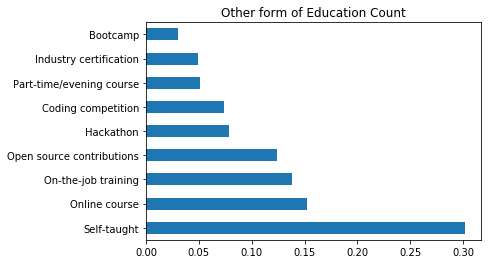

In [53]:
possible_vals = ['Self-taught', 'Online course', 'Open source contributions', 'On-the-job training', 'Hackathon', 
                   'Coding competition', 'Part-time/evening course', 'Industry certification','Bootcamp']

props_df = clean_and_plot(df_prof_dev, 'index', 'EducationTypes','Other form of Education Count', possible_vals)

Figure above suggest that most respondents became software developers by teaching themselves. I believe this should depend on the level of education one must have acquired. So let us see this...

In [61]:
def higher_edu(formal_ed_str):
    """
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is in ("Doctoral degree", Master's degree", "Professional degree")
        return 0 otherwise
    
    """
    if formal_ed_str in ("Doctoral degree", "Master's degree", "Professional degree"):
        return 1
    else:
        return 0
    

In [66]:
df['HigherEdu'] = df_prof_dev["FormalEducation"].apply(higher_edu) #engineering a new feature HigerEdu as defined above

df_edu_1 = df_prof_dev[df_prof_dev['HigherEdu'] == 1] # Subset df to only those with HigherEdu of 1
df_edu_0 = df_prof_dev[df_prof_dev['HigherEdu'] == 0] # Subset df to only those with HigherEdu of 0


possible_vals = ['Self-taught', 'Online course', 'Open source contributions', 'On-the-job training', 'Hackathon', 
                   'Coding competition', 'Part-time/evening course', 'Industry certification','Bootcamp']



ed_1_perc = clean_and_plot(df_edu_1, 'index', 'EducationTypes', 'Higher Formal Education', possible_vals,plot=False)
ed_0_perc = clean_and_plot(df_edu_0, 'index', 'EducationTypes', 'Max of Bachelors Higher Ed',possible_vals, plot=False)

comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
#comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])
comp_df

,ed_1_perc,ed_0_perc,Diff_HigherEd_Vals
index,,,
Self-taught,0.299698,0.302622,-0.002924
Online course,0.154653,0.151498,0.003155
On-the-job training,0.136863,0.138606,-0.001743
Open source contributions,0.129353,0.122056,0.007297
Hackathon,0.072543,0.081266,-0.008722
Coding competition,0.071620,0.074595,-0.002974
Industry certification,0.053369,0.047971,0.005398
Part-time/evening course,0.051397,0.051404,-0.000007
Bootcamp,0.030503,0.029982,0.000521


**Comment**

Surprisingly, those with Bachelors as their maximum level of education became developers by teaching themselves. Although one would expect that those with Masters degree or higher would have become developers by teaching them selves, but the figures shows us that these categories became developers by taking online course and on-the-job training. 

but since we saw earlier that Computer Science or Software Engineering were the majors of the Bachelor degree holders then the result aligns well. We will now conclude by finding out what resources those with only bachelor degrees used to teach themselves how to become a software developer.

In [67]:
print_question('SelfTaughtTypes')

["You indicated that you had taught yourself a programming technology without taking a course. What resources did you use to do that? If you've done it more than once, please think about the most recent time you've done so."]

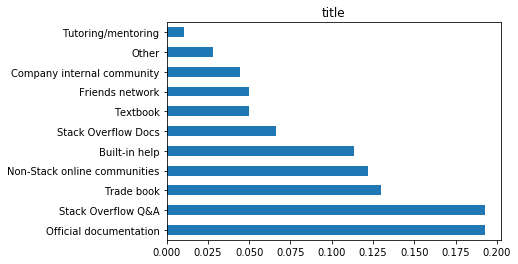

,SelfTaughtTypes
index,
Official documentation,0.193019
Stack Overflow Q&A,0.192794
Trade book,0.129577
Non-Stack online communities,0.121985
Built-in help,0.113331
Stack Overflow Docs,0.066171
Textbook,0.050051
Friends network,0.049862
Company internal community,0.044549


In [69]:
possible_vals = ['Official documentation', 'Trade book', 'Stack Overflow Q&A','Non-Stack online communities', 'Built-in help',
                'Tutoring/mentoring', 'Textbook', 'Stack Overflow Docs', 'Friends network','Company internal community',
                'Other']

clean_and_plot(df_prof_dev, 'index', 'SelfTaughtTypes','title', possible_vals)

We have seen how to become a software developer. So amongst these developers, let us see which of them have the highest job satisfaction with the route they followed.

### Education vs Career Success

In [35]:
print_question('EducationImportant')

['Overall, how important has your formal schooling and education been to your career success?']

for thse with higher formal education

In [92]:
plot_edu1 = value_count_plot(df_edu_1, 'EducationImportant', "Proportion of Education Importance count", plot=False)

In [93]:
plot_edu0 = value_count_plot(df_edu_0, 'EducationImportant', "Proportion of Education Important count",plot=False)


In [130]:
plot_edu1

Important               0.163400
Somewhat important      0.135217
Very important          0.115163
Not very important      0.068216
Not at all important    0.021042
Name: EducationImportant, dtype: float64

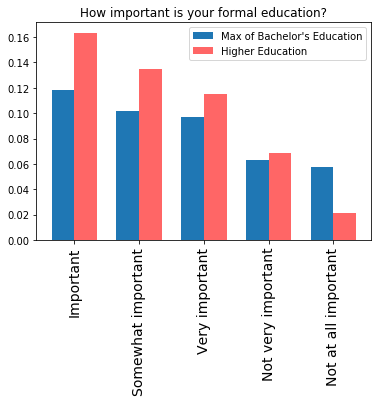

In [129]:
x = np.arange(len(plot_edu1))
width = 0.35  # the width of the bars
labels = ['Important','Somewhat important','Very important', 'Not very important','Not at all important']



rects1 = plt.bar(x, plot_edu0, width, label="Max of Bachelor's Education")
rects2 = plt.bar(x + width, plot_edu1,width,color='red',alpha=0.6, label='Higher Education')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
plt.title('How important is your formal education?')
#ax.set_xticklabels(rects1.get_xticklabels(), rotation=0)
plt.legend()

locations = x + width / 2  # xtick locations

plt.xticks(locations, labels,fontsize=14,rotation=90)

   

fig.tight_layout()

plt.show()

## How can a novice switch to a career as a software developer?

By novice, we mean individuals who do not have a degree in a field related to computer programming and who has work experience in non-coding jobs. In order to understand how to break into the field of software development, we will look at the CousinEducation field. 

In [80]:
print_question('CousinEducation')

["Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which

In [143]:
df_prof_dev['CousinEducation'].value_counts().reset_index().head(10)

,index,CousinEducation
0,Take online courses; Buy books and work through the exercises,513
1,Take online courses,374
2,Take online courses; Part-time/evening courses; Buy books and work through the exercises,357
3,Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises,345
4,None of these,324
5,Take online courses; Contribute to open source; Buy books and work through the exercises; Conferences/meet-ups,309
6,Other,291
7,Take online courses; Contribute to open source; Buy books and work through the exercises,268
8,Return to college; Take online courses; Part-time/evening courses; Buy books and work through the exercises,251
9,Take online courses; Contribute to open source; Part-time/evening courses; Buy books and work through the exercises,231


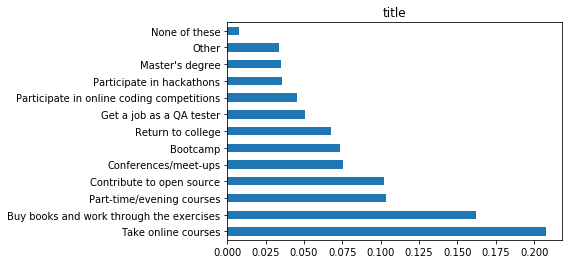

,CousinEducation
index,
Take online courses,0.207814
Buy books and work through the exercises,0.161907
Part-time/evening courses,0.103481
Contribute to open source,0.102231
Conferences/meet-ups,0.075490
Bootcamp,0.073387
Return to college,0.067687
Get a job as a QA tester,0.050945
Participate in online coding competitions,0.045301


In [149]:
# Here is a list of the different answers provided
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

clean_and_plot(df_prof_dev, 'index', 'CousinEducation','title', possible_vals)

In [150]:
ed_1_perc = clean_and_plot(df_edu_1,'index','CousinEducation', 'Higher Formal Education',possible_vals, plot=False)
ed_0_perc = clean_and_plot(df_edu_0, 'index','CousinEducation','Max of Bachelors Higher Ed',possible_vals, plot=False)



comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,ed_1_perc,ed_0_perc,Diff_HigherEd_Vals
index,,,
Take online courses,0.206234,0.210548,-0.004314
Buy books and work through the exercises,0.162959,0.160867,0.002092
Part-time/evening courses,0.101736,0.103791,-0.002055
Contribute to open source,0.100409,0.102513,-0.002104
Bootcamp,0.074762,0.071677,0.003085
Return to college,0.068975,0.068898,0.000077
Conferences/meet-ups,0.064461,0.074679,-0.010218
Master's degree,0.060532,0.027778,0.032754
Get a job as a QA tester,0.047257,0.046068,0.001190


### Comment

- Regardless of formal education, online courses are the top suggested form of education

- The plot above clearly shows that professional developers who had obtained more than first degree as a formal education, are more likely to advice the novice to get more education, that professional developers with maximum of Bachelor's degree.


## Bootcamps

### What does the data suggest about graduatesof bootcamps, in terms of job placement and salary?

We are interested in just bootcamp grads. So let us narrow our dataset to these category. You indicated previously that you went through a developer “bootcamp.” How long did it take you to get a full-time job as a developer

In [68]:
df.loc[:,['TimeAfterBootcamp', 'Gender']]

,TimeAfterBootcamp,Gender
0,NaN,Male
1,NaN,Male
2,NaN,Male
3,NaN,Male
4,NaN,NaN
...,...,...
51387,NaN,Male
51388,NaN,Male
51389,NaN,NaN
51390,NaN,Male


In [60]:
bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==False]
not_bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==True]
bootcamp_df.shape

(2602, 155)

So there are 2600 of the bootcamp graduates. Many boot camps claims that they are aimed at helping people who are under represented in technical commuinities. So let us look at oneof these categories 'gender'

In [62]:
bootcamp_df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'Gender', 'HighestEducationParents', 'Race', 'SurveyLong',
       'QuestionsInteresting', 'QuestionsConfusing', 'InterestedAnswers',
       'Salary', 'ExpectedSalary', 'HigherEd'],
      dtype='object', length=155)

In [63]:
bootcamp_df['Gender'].value_counts()/bootcamp_df.shape[0]

Male                                                       0.719447
Female                                                     0.093774
Other                                                      0.005380
Gender non-conforming                                      0.004612
Male; Other                                                0.002306
Male; Gender non-conforming                                0.001153
Female; Gender non-conforming                              0.001153
Male; Female; Transgender; Gender non-conforming; Other    0.000769
Female; Transgender; Gender non-conforming                 0.000769
Transgender                                                0.000769
Transgender; Gender non-conforming                         0.000769
Male; Transgender                                          0.000769
Male; Female                                               0.000769
Female; Gender non-conforming; Other                       0.000384
Male; Gender non-conforming; Other              

In [66]:
#let us do the calculation above again for gender column with no missing values only
bootcamp_df['Gender'].value_counts()/(bootcamp_df.shape[0] - sum(bootcamp_df['Gender'].isnull()))

Male                                                       0.863071
Female                                                     0.112494
Other                                                      0.006455
Gender non-conforming                                      0.005533
Male; Other                                                0.002766
Male; Gender non-conforming                                0.001383
Female; Gender non-conforming                              0.001383
Male; Female; Transgender; Gender non-conforming; Other    0.000922
Female; Transgender; Gender non-conforming                 0.000922
Transgender                                                0.000922
Transgender; Gender non-conforming                         0.000922
Male; Transgender                                          0.000922
Male; Female                                               0.000922
Female; Gender non-conforming; Other                       0.000461
Male; Gender non-conforming; Other              

Let's compare this with non bootcamp graduates

In [69]:
#let us do the calculation above again for gender column with no missing values only
not_bootcamp_df['Gender'].value_counts()/(not_bootcamp_df.shape[0] - sum(not_bootcamp_df['Gender'].isnull()))

Male                                                       0.903857
Female                                                     0.071659
Other                                                      0.006418
Male; Other                                                0.005019
Gender non-conforming                                      0.004501
Male; Gender non-conforming                                0.001886
Female; Transgender                                        0.001703
Transgender                                                0.001612
Female; Gender non-conforming                              0.000791
Transgender; Gender non-conforming                         0.000395
Male; Female; Transgender; Gender non-conforming; Other    0.000395
Male; Female                                               0.000395
Male; Transgender                                          0.000274
Female; Transgender; Gender non-conforming                 0.000182
Male; Female; Transgender; Gender non-conforming

About 4 percent larger in male category and that comes from the female group indicating that there's a slice increase o female in bootcamps than in current industry. But they are the same for other group.

In [70]:
#let us do the calculation above again for gender column with no missing values only
bootcamp_df['FormalEducation'].value_counts()/(bootcamp_df.shape[0] - sum(bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.475019
Master's degree                                                      0.225211
Some college/university study without earning a bachelor's degree    0.162567
Secondary school                                                     0.069562
Doctoral degree                                                      0.022291
Professional degree                                                  0.016141
I prefer not to answer                                               0.011914
Primary/elementary school                                            0.009224
I never completed any formal education                               0.008071
Name: FormalEducation, dtype: float64

So about 47% had bachelors before going into bootcamps. 22% have master's degree, 2% have doctoral degree. 

In [71]:
#let us do the calculation above again for gender column with no missing values only
not_bootcamp_df['FormalEducation'].value_counts()/(not_bootcamp_df.shape[0] - sum(not_bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.417565
Master's degree                                                      0.216335
Some college/university study without earning a bachelor's degree    0.157942
Secondary school                                                     0.117381
Doctoral degree                                                      0.025620
I prefer not to answer                                               0.022095
Primary/elementary school                                            0.020967
Professional degree                                                  0.013794
I never completed any formal education                               0.008301
Name: FormalEducation, dtype: float64

few have bachelors, about the same have other degrees like in those in bootcamp. After a bachelors, people are choosing other professional education.

In [72]:
bootcamp_df['TimeAfterBootcamp'].value_counts()/bootcamp_df.shape[0] 

I already had a job as a developer when I started the program    0.458493
Immediately upon graduating                                      0.112990
I got a job as a developer before completing the program         0.096849
One to three months                                              0.087625
I haven't gotten a job as a developer yet                        0.081091
Less than a month                                                0.059954
Four to six months                                               0.040354
Longer than a year                                               0.032667
Six months to a year                                             0.029977
Name: TimeAfterBootcamp, dtype: float64

We see a huge spike at the beginning which might be those individuals who are still searching for work. There's someone who makes 200,000 per year. Bootcamps are not consistent where people's salary will fall. There are greater factors that determines whether someone went to a bootcamp or not. there isn't a lot of consistency around salary for these graduates.

So how are the placement rates and what kind of salary can someone expect?

This is hard to tell because alot of individuals already had a job before going in the boot camp. Again there's a huge spectrum showing the salary of those individuals are all over the place.

In [78]:
#After removing those who already had roles as developers before the bootcamp, then recalculating the percentages, we have the following results:
b = bootcamp_df.query('TimeAfterBootcamp != "I already had a job as a developer when I started the program"')
b['TimeAfterBootcamp'].value_counts()/b.shape[0] 

Immediately upon graduating                                 0.208659
I got a job as a developer before completing the program    0.178850
One to three months                                         0.161817
I haven't gotten a job as a developer yet                   0.149752
Less than a month                                           0.110717
Four to six months                                          0.074521
Longer than a year                                          0.060326
Six months to a year                                        0.055358
Name: TimeAfterBootcamp, dtype: float64

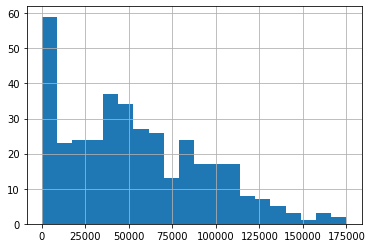

In [79]:
#build histogram of salary with 20bins
b['Salary'].hist(bins=20);

 All of these were false - it was difficult to bucket bootcamp grads based on salary or completion times, as these were extremely variable. We were able to see that not all were hired, but one option was not currently hired, and we didn't know how long since those students completed their bootcamp.
 
 ### Job Satisfaction

In [80]:
#'The proportion of missing values in the Job Satisfaction column'
df['JobSatisfaction'].isnull().sum()/df.shape[0]

0.21435242839352428

In [82]:
jobsat_df = df[df['JobSatisfaction'].isnull()==False]
jobsat_df.shape[0]/df.shape[0]

0.7856475716064757

In [83]:
not_jobsat_df = df[df['JobSatisfaction'].isnull()==True]
not_jobsat_df.shape[0]/df.shape[0]

0.21435242839352428

In [100]:
#'According to EmploymentStatus, which group has the highest average job satisfaction?'
df.groupby('EmploymentStatus').mean()['JobSatisfaction']

EmploymentStatus
Employed full-time                                      6.926805
Employed part-time                                      6.821468
I prefer not to say                                          NaN
Independent contractor, freelancer, or self-employed    7.252823
Not employed, and not looking for work                  7.000000
Not employed, but looking for work                           NaN
Retired                                                      NaN
Name: JobSatisfaction, dtype: float64

In [102]:
df['CompanyType'].value_counts()

Privately-held limited company, not in startup mode                      16709
Publicly-traded corporation                                               5871
I don't know                                                              3233
Sole proprietorship or partnership, not in startup mode                   2831
Government agency or public school/university                             2451
Venture-funded startup                                                    2387
I prefer not to answer                                                    1816
Pre-series A startup                                                      1288
Non-profit/non-governmental organization or private school/university     1225
State-owned company                                                        670
Something else                                                             342
Name: CompanyType, dtype: int64

In [108]:
#'In general, do smaller companies appear to have employees with higher job satisfaction?'
df.groupby('CompanySize').mean()['JobSatisfaction'].sort_values(ascending=False)

CompanySize
I prefer not to answer      7.280835
Fewer than 10 employees     7.008749
10 to 19 employees          7.000799
20 to 99 employees          6.949092
100 to 499 employees        6.937089
1,000 to 4,999 employees    6.884509
500 to 999 employees        6.883661
I don't know                6.842679
10,000 or more employees    6.810345
5,000 to 9,999 employees    6.748153
Name: JobSatisfaction, dtype: float64

In [109]:
#'Do individuals who program outside of work appear to have higher JobSatisfaction?'
df.groupby('ProgramHobby').mean()['JobSatisfaction'].sort_values(ascending=False)

ProgramHobby
Yes, both                                    7.108041
Yes, I contribute to open source projects    7.041535
Yes, I program as a hobby                    6.913072
No                                           6.833825
Name: JobSatisfaction, dtype: float64

In [110]:
#'Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?'
df.groupby('HomeRemote').mean()['JobSatisfaction'].sort_values(ascending=False)

HomeRemote
All or almost all the time (I'm full-time remote)          7.388430
Less than half the time, but at least one day each week    7.120125
A few days each month                                      7.077509
About half the time                                        6.973702
More than half, but not all, the time                      6.953184
It's complicated                                           6.840830
Never                                                      6.632502
Name: JobSatisfaction, dtype: float64

In [111]:
#'A friend says a Doctoral degree increases the chance of having job you like, does this seem true?'
df.groupby('FormalEducation').mean()['JobSatisfaction'].sort_values(ascending=False)            

FormalEducation
Doctoral degree                                                      7.348857
Secondary school                                                     7.143082
Professional degree                                                  7.087459
Some college/university study without earning a bachelor's degree    7.081334
I prefer not to answer                                               7.005682
Primary/elementary school                                            6.956897
Master's degree                                                      6.953151
Bachelor's degree                                                    6.866363
I never completed any formal education                               6.833333
Name: JobSatisfaction, dtype: float64